# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading the data
dataset = pd.read_csv("../../../desktop/PIAIC/creditcard.csv")
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
dataset["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# dataset.dtypes

In [7]:
# Checking for missing values
dataset.isna().sum().sum()

0

In [8]:
len(dataset), dataset.size

(284807, 8829017)

In [9]:
284807*31

8829017

In [10]:
dataset.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [11]:
# Shuffling the dataset
# import random
# random.seed(42)

from sklearn.utils import shuffle
shuffled_dataset = shuffle(dataset, random_state = 42).reset_index(drop=True)
shuffled_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [12]:
# Splitting dataset in data and label
data = shuffled_dataset.drop("Class", axis = 1)
labels = shuffled_dataset["Class"]
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.12767,-2.358579,0.673461,-1.4137,-0.462762,-2.018575,-1.042804,364.19


In [13]:
labels.head(3)

0    1
1    0
2    0
Name: Class, dtype: int64

In [14]:
# Splitting our data in training and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.5, random_state = 42)
len(train_data), len(test_data), len(train_labels), len(test_labels)

(142403, 142404, 142403, 142404)

In [15]:
# Standardizing our data
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [16]:
train_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
102120,-0.583936,0.624947,0.157208,-0.081808,0.335736,0.034280,-0.752095,0.447734,-0.314608,-0.318989,...,0.104220,-0.497551,-1.568299,0.075918,0.100094,0.683902,0.313660,-0.163429,0.051129,-0.129808
147630,-1.330744,0.636068,0.095854,-0.135089,0.321464,-0.021002,-0.729442,0.350225,-0.229928,-0.083890,...,-0.044528,-0.541518,-1.781606,0.088567,-0.226649,0.617379,0.345763,-0.186800,0.031778,-0.156855
243316,0.560379,1.057799,-0.012340,-0.689059,0.294439,-0.073085,-0.904461,0.177832,-0.303226,0.416835,...,-0.248389,-0.384200,-0.903335,0.536969,0.101146,-0.541486,0.401715,-0.167150,-0.182567,-0.335683
259221,-1.401342,-0.318014,0.166603,0.909797,-0.579750,0.149769,-1.009815,0.385814,-0.068410,-0.114806,...,-0.061845,0.083725,-0.052274,0.069623,0.695167,-1.076825,1.515530,0.055948,0.451037,-0.285821
144969,-0.304957,-0.701688,0.293516,1.206438,0.426000,-0.693244,-0.139074,-0.302760,0.371143,-1.593118,...,-0.754813,-0.545980,-1.238540,-0.126320,0.530798,-0.372354,-0.911765,-0.437101,-0.125753,-0.172143


In [17]:
test_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-0.467831,0.605516,0.097550,0.079049,0.774632,0.028917,-0.074957,0.029096,0.001856,0.094095,...,-0.185805,0.101811,0.282818,-0.256306,-0.764052,1.234885,-0.455234,0.061306,0.049921,-0.227061
49906,-0.795371,-0.385007,0.496908,1.244823,-0.143064,0.187512,-0.135548,0.677923,-0.005964,-0.549728,...,0.226806,0.222723,0.915766,-0.586767,0.418223,0.774356,1.102653,0.197811,-0.361087,-0.263791
29474,1.313339,-0.312673,0.600038,-0.059859,-0.560724,1.460233,-0.160901,1.249815,-0.209860,-1.055271,...,0.186137,0.187893,0.640457,-1.360944,-2.138374,2.868024,0.411409,-0.051003,0.044200,-0.292760
276481,-1.167322,0.593333,0.097716,0.388224,0.357440,-0.227855,-0.229132,-0.074228,0.044437,-0.249236,...,-0.130834,-0.216347,-0.636621,0.279206,0.373894,0.181694,0.192835,-0.038006,0.025293,-0.327020
278846,-0.473815,-0.127984,0.623716,0.854334,0.292533,0.219676,-0.316718,0.473610,-0.017571,-0.618849,...,0.068616,-0.166153,-0.414924,0.121735,0.085706,-1.517180,0.240221,0.385690,0.533878,-0.340740


In [18]:
# Further splitting the train data into validation data
par_test_data, val_data, par_test_labels, val_labels = train_test_split(test_data, test_labels,
                                                                          test_size = 0.4, random_state = 42)
len(par_test_data), len(val_data), len(par_test_labels), len(val_labels)

(85442, 56962, 85442, 56962)

In [19]:
len(train_data), len(par_test_data), len(val_data) # 50% training data, 30% test data, 20% val data

(142403, 85442, 56962)

In [20]:
np.round((142403*100)/284807), np.round((85442*100)/284807), np.round((56962*100)/284807)

(50.0, 30.0, 20.0)

In [68]:
# Creating model for Binary classification

# setting up random seed
tf.random.set_seed(42)

# setting up Early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 5)

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu", input_shape = (train_data.shape[1],)),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. compiling the model
model.compile(loss = "BinaryCrossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# 3. Fitting the model
history = model.fit(train_data,
                    train_labels,
                    epochs = 100,
                    batch_size = 256,
                    validation_data = (val_data, val_labels),
                    callbacks = callback)

Epoch 1/100
557/557 [==============================] - 1s 1ms/step - loss: 0.7136 - accuracy: 0.5702 - val_loss: 0.0831 - val_accuracy: 0.9985
Epoch 2/100
557/557 [==============================] - 0s 870us/step - loss: 0.0573 - accuracy: 0.9988 - val_loss: 0.0206 - val_accuracy: 0.9991
Epoch 3/100
557/557 [==============================] - 0s 774us/step - loss: 0.0179 - accuracy: 0.9991 - val_loss: 0.0106 - val_accuracy: 0.9992
Epoch 4/100
557/557 [==============================] - 0s 685us/step - loss: 0.0101 - accuracy: 0.9991 - val_loss: 0.0072 - val_accuracy: 0.9993
Epoch 5/100
557/557 [==============================] - 0s 665us/step - loss: 0.0080 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9993
Epoch 6/100
557/557 [==============================] - 0s 679us/step - loss: 0.0060 - accuracy: 0.9993 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 7/100
557/557 [==============================] - 0s 683us/step - loss: 0.0052 - accuracy: 0.9993 - val_loss: 0.0044 - val_accu

557/557 [==============================] - 0s 660us/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 58/100
557/557 [==============================] - 0s 692us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 59/100
557/557 [==============================] - 0s 721us/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 60/100
557/557 [==============================] - 0s 743us/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 61/100
557/557 [==============================] - 0s 807us/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 62/100
557/557 [==============================] - 0s 815us/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 63/100
557/557 [==============================] - 0s 826us/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy

In [74]:
# 4. Evaluating the model
model.evaluate(par_test_data, par_test_labels)

2671/2671 [==============================] - 1s 346us/step - loss: 0.0033 - accuracy: 0.9994


[0.0032757939770817757, 0.9993913769721985]

In [75]:
# 5. Making prediction
pred_labels = model.predict(par_test_data)
pred_labels.shape

(85442, 1)

Text(0, 0.5, 'loss & accuracy')

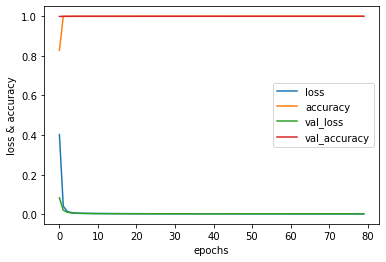

In [77]:
# Visualizing our model's loss and accuracy
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss & accuracy")

In [87]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.402346,0.827770,0.083149,0.998525
1,0.041077,0.998827,0.020613,0.999087
2,0.015075,0.999129,0.010586,0.999210
3,0.009193,0.999221,0.007197,0.999298
4,0.006898,0.999249,0.005708,0.999298
...,...,...,...,...
75,0.002032,0.999572,0.002720,0.999368
76,0.002054,0.999544,0.002642,0.999386
77,0.002015,0.999558,0.002776,0.999403
78,0.002021,0.999579,0.002626,0.999421


Text(0, 0.5, 'Accuracy')

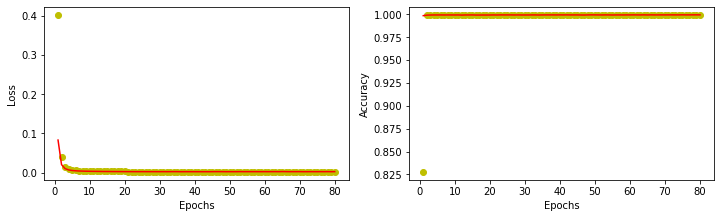

In [95]:
# Visualizing model's loss and accuracy more clearly
model_dict = history.history

plt.figure(figsize=(12,7))
plt.subplot(2,2,1)

loss = model_dict["loss"]
val_loss = model_dict["val_loss"]
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, 'yo', label = "Training Loss")
plt.plot(epochs, val_loss, 'r', label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(2,2,2)
accuracy = model_dict["accuracy"]
val_acc = model_dict["val_accuracy"]
plt.plot(epochs, accuracy, "yo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation Acuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")